# **Aprendizado de Máquina Não Supervisionado - Agrupamento Hierárquico**

In [1]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import warnings
warnings.filterwarnings("ignore")

In [51]:
df = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/Trabalho2Bim/NaoSupervisionado/covid_limpo.csv',
                    sep=',', encoding='iso-8859-1')

In [52]:
df.head()

pais  total_casos  total_mortes   populacao  %casos_popul  %mortes_popul
0    India     44587307        528629  1406631776          3.17           0.04
1    Japan     21229216         44678   125584838         16.90           0.04
2   Turkey     16873793        101139    85561976         19.72           0.12
3  Vietnam     11477886         43148    98953541         11.60           0.04
4     Iran      7548320        144421    86022837          8.77           0.17

## **EXPLORAÇÃO E TRATAMENTO DOS DADOS**

**Valores Missing (NAN)**

In [53]:
# RELAÇÃO DA QUANTIDADE
df.isnull().sum()

pais             0
total_casos      0
total_mortes     0
populacao        0
%casos_popul     0
%mortes_popul    0
dtype: int64

**Análise dos tipos de atributos.**

In [54]:
# object: strings
# int64: inteiros
# float64: reais
# complex: complexos
df.dtypes

pais              object
total_casos        int64
total_mortes       int64
populacao          int64
%casos_popul     float64
%mortes_popul    float64
dtype: object

**Dados Estatísticos**

In [55]:
df.describe()

total_casos   total_mortes     populacao  %casos_popul  %mortes_popul
count  1.370000e+02     137.000000  1.370000e+02    137.000000     137.000000
mean   1.328209e+06   13183.605839  4.550406e+07      7.187518       0.051168
std    4.629314e+06   50101.818420  1.744734e+08      8.559653       0.054369
min    1.000000e+01       1.000000  4.965000e+03      0.000000       0.000000
25%    2.154400e+04     189.000000  1.369429e+06      0.450000       0.010000
50%    1.031310e+05    1466.000000  9.432800e+06      3.110000       0.030000
75%    6.707630e+05    7118.000000  2.926699e+07     11.030000       0.090000
max    4.458731e+07  528629.000000  1.448471e+09     29.950000       0.190000

**Análise dos outliers**

In [56]:
import plotly.express as px

In [57]:
boxplot = px.box(df, y="%casos_popul")
boxplot.show()

In [58]:
boxplot = px.box(df, y="%mortes_popul")
boxplot.show()

## **PRÉ-PROCESSAMENTO**

In [59]:
df.head(2)

pais  total_casos  total_mortes   populacao  %casos_popul  %mortes_popul
0  India     44587307        528629  1406631776          3.17           0.04
1  Japan     21229216         44678   125584838         16.90           0.04

In [60]:
df_covid = df[['pais', '%casos_popul','%mortes_popul']]
df_covid

pais  %casos_popul  %mortes_popul
0                India          3.17           0.04
1                Japan         16.90           0.04
2               Turkey         19.72           0.12
3              Vietnam         11.60           0.04
4                 Iran          8.77           0.17
..                 ...           ...            ...
132           Kiribati          2.78           0.01
133         Montserrat         28.12           0.16
134              Macao          0.12           0.00
135  Wallis and Futuna          6.93           0.06
136     Western Sahara          0.00           0.00

[137 rows x 3 columns]

###**Transformar variáveis categóricas em numéricas**

In [61]:
from sklearn.preprocessing import LabelEncoder

In [62]:
df_aux = df_covid.iloc[:, 0:11].values

In [63]:
le = LabelEncoder()
df_aux = le.fit_transform(df_aux[:,0])
df_aux

array([ 53,  59, 124, 131,  55,  54, 117,  74,  28, 120,  20, 111, 100,
        56,   7,  52,  60,  95,  93,  61,  40,  84,  67,  46,  26,  12,
        25, 126,  88,   8,  98,  82,   6, 106, 113,  64,  32,  86,  97,
       130,  33,  70,  38,  51, 101,  94,  62, 135,   1,  13,   2,  92,
       136,  22, 128,  85,  66,  65,  34,   0, 127,  87,  44,  58,  18,
       102,  19,  76,   3,  41,  29, 107,  73,  57,  89,  37,  49,   9,
        39,  72, 115,  78,  17,  11, 116,  15,  42,  27,  99,  79,  80,
       119, 122,  47,  68,  50,  75,  10, 110,  24, 121,  14, 109,  90,
       112, 118,  35, 123, 104,  31,  30,  77,  16,  43,  45, 134, 129,
        36,  91,  81,   5,  48,  23,  69, 108,  21, 114, 103, 125, 105,
        96,   4,  63,  83,  71, 132, 133])

In [64]:
list(le.classes_)

['Afghanistan',
 'Albania',
 'Algeria',
 'Angola',
 'Anguilla',
 'Antigua and Barbuda',
 'Azerbaijan',
 'Bangladesh',
 'Belarus',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Botswana',
 'Burkina Faso',
 'Burundi',
 'CAR',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Chad',
 'China',
 'Comoros',
 'Congo',
 'Costa Rica',
 'Cuba',
 'CuraÃ\x83Â§ao',
 'DPRK',
 'DRC',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'French Guiana',
 'Gabon',
 'Gambia',
 'Ghana',
 'Greenland',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'Honduras',
 'Hong Kong',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Ivory Coast',
 'Jamaica',
 'Japan',
 'Jordan',
 'Kazakhstan',
 'Kenya',
 'Kiribati',
 'Kuwait',
 'Kyrgyzstan',
 'Laos',
 'Lebanon',
 'Lesotho',
 'Liberia',
 'Libya',
 'Macao',
 'Madagascar',
 'Malawi',
 'Malaysia',
 'Mali',
 'Malta',
 'Marshall Islands',
 'Mauritania',


In [65]:
df_covid['pais'] = df_aux
df_covid.head()

pais  %casos_popul  %mortes_popul
0    53          3.17           0.04
1    59         16.90           0.04
2   124         19.72           0.12
3   131         11.60           0.04
4    55          8.77           0.17

###**Escalonamento**

In [66]:
from sklearn.preprocessing import StandardScaler

In [67]:
escala = StandardScaler()
df2_esc = escala.fit_transform(df_covid)

In [68]:
df2_esc

array([[-3.79291303e-01, -4.71077689e-01, -2.06163142e-01],
       [-2.27574782e-01,  1.13884572e+00, -2.06163142e-01],
       [ 1.41602086e+00,  1.46950734e+00,  1.27066564e+00],
       [ 1.59302347e+00,  5.17389487e-01, -2.06163142e-01],
       [-3.28719129e-01,  1.85555311e-01,  2.19368363e+00],
       [-3.54005216e-01, -5.73090315e-01,  1.63044053e-01],
       [ 1.23901826e+00,  2.30788697e+00, -2.15595442e-02],
       [ 1.51716521e-01,  8.66812047e-01,  1.08606204e+00],
       [-1.01144347e+00,  1.31003932e+00, -9.44577531e-01],
       [ 1.31487652e+00, -5.95095053e-02, -2.15595442e-02],
       [-1.21373217e+00,  4.50553628e-01,  1.27066564e+00],
       [ 1.08730174e+00, -6.77174178e-02,  2.19368363e+00],
       [ 8.09154780e-01, -4.31210685e-01,  1.63044053e-01],
       [-3.03433042e-01, -1.59177014e-01,  1.63044053e-01],
       [-1.54245130e+00, -7.00899238e-01, -5.75370337e-01],
       [-4.04577390e-01,  1.87286761e+00,  1.45526924e+00],
       [-2.02288695e-01,  1.14588107e+00

## **Agrupamento Hierárquico: todos atributos**


In [69]:
df2_esc

array([[-3.79291303e-01, -4.71077689e-01, -2.06163142e-01],
       [-2.27574782e-01,  1.13884572e+00, -2.06163142e-01],
       [ 1.41602086e+00,  1.46950734e+00,  1.27066564e+00],
       [ 1.59302347e+00,  5.17389487e-01, -2.06163142e-01],
       [-3.28719129e-01,  1.85555311e-01,  2.19368363e+00],
       [-3.54005216e-01, -5.73090315e-01,  1.63044053e-01],
       [ 1.23901826e+00,  2.30788697e+00, -2.15595442e-02],
       [ 1.51716521e-01,  8.66812047e-01,  1.08606204e+00],
       [-1.01144347e+00,  1.31003932e+00, -9.44577531e-01],
       [ 1.31487652e+00, -5.95095053e-02, -2.15595442e-02],
       [-1.21373217e+00,  4.50553628e-01,  1.27066564e+00],
       [ 1.08730174e+00, -6.77174178e-02,  2.19368363e+00],
       [ 8.09154780e-01, -4.31210685e-01,  1.63044053e-01],
       [-3.03433042e-01, -1.59177014e-01,  1.63044053e-01],
       [-1.54245130e+00, -7.00899238e-01, -5.75370337e-01],
       [-4.04577390e-01,  1.87286761e+00,  1.45526924e+00],
       [-2.02288695e-01,  1.14588107e+00

In [70]:
df2_esc.shape

(137, 3)

**Dendograma**

In [71]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

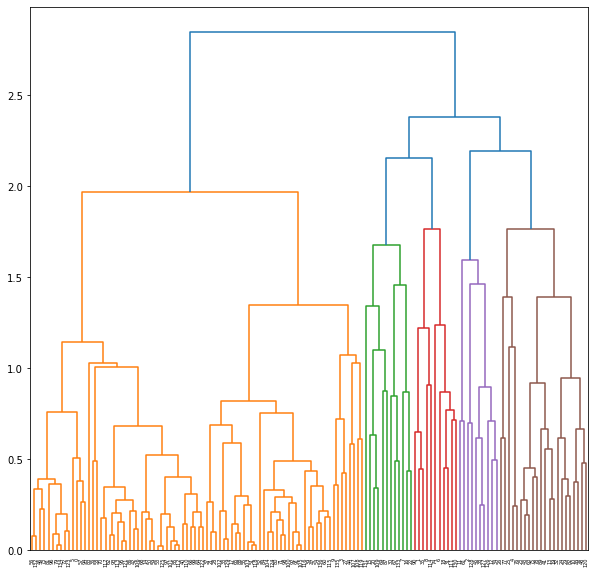

In [72]:
plt.figure(figsize=(10, 10))
dendrograma = dendrogram(linkage(df2_esc, method = 'average')) #complete, single e ward (dados dispersos)

In [73]:
from sklearn.cluster import AgglomerativeClustering

In [74]:
hier = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage = 'average')
classificacao = hier.fit_predict(df2_esc)

In [75]:
classificacao

array([5, 6, 3, 4, 0, 5, 2, 1, 6, 4, 0, 3, 3, 0, 5, 1, 1, 4, 2, 0, 1, 4,
       1, 0, 0, 0, 0, 4, 4, 0, 1, 2, 0, 4, 3, 6, 5, 4, 3, 4, 5, 0, 5, 0,
       4, 3, 5, 4, 0, 0, 5, 4, 4, 5, 4, 4, 5, 5, 5, 5, 4, 3, 5, 0, 5, 4,
       5, 1, 5, 1, 5, 4, 5, 5, 2, 0, 0, 0, 0, 5, 4, 5, 0, 5, 4, 5, 5, 1,
       4, 0, 6, 4, 4, 5, 5, 5, 5, 5, 4, 5, 4, 5, 4, 4, 4, 4, 5, 4, 4, 1,
       5, 2, 5, 5, 6, 4, 4, 5, 4, 4, 0, 5, 5, 5, 4, 5, 3, 3, 3, 4, 2, 1,
       5, 1, 5, 4, 4])

**Agrupamento**

In [76]:
agrupamento = pd.DataFrame(classificacao, columns = ['Grupo'])
agrupamento

Grupo
0        5
1        6
2        3
3        4
4        0
..     ...
132      5
133      1
134      5
135      4
136      4

[137 rows x 1 columns]

In [77]:
df_hc = pd.concat([df, agrupamento],axis=1)
df_hc

pais  total_casos  total_mortes   populacao  %casos_popul  \
0                India     44587307        528629  1406631776          3.17   
1                Japan     21229216         44678   125584838         16.90   
2               Turkey     16873793        101139    85561976         19.72   
3              Vietnam     11477886         43148    98953541         11.60   
4                 Iran      7548320        144421    86022837          8.77   
..                 ...          ...           ...         ...           ...   
132           Kiribati         3430            13      123419          2.78   
133         Montserrat         1396             8        4965         28.12   
134              Macao          793             6      667490          0.12   
135  Wallis and Futuna          761             7       10982          6.93   
136     Western Sahara           10             1      626161          0.00   

     %mortes_popul  Grupo  
0             0.04      5  
1             0.04      6  
2             0.12      3  
3             0.04      4  
4             0.17      0  
..             ...    ...  
132           0.01      5  
133           0.16      1  
134           0.00      5  
135           0.06      4  
136           0.00      4  

[137 rows x 7 columns]

In [78]:
df_hc.loc[df.pais == 'China']

pais  total_casos  total_mortes   populacao  %casos_popul  %mortes_popul  \
53  China       250449          5226  1448471400          0.02            0.0   

    Grupo  
53      5

In [79]:
grupo = df_hc.loc[df_hc.Grupo == 6]
grupo.head(2)

pais  total_casos  total_mortes  populacao  %casos_popul  %mortes_popul  \
1  Japan     21229216         44678  125584838         16.90           0.04   
8   DPRK      4772813            74   25990679         18.36           0.00   

   Grupo  
1      6  
8      6